# Knock airport Weather
***
### Description


In [24]:
# Import libs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [25]:
# Load data
file_path = 'hly4935.csv'
df = pd.read_csv(file_path)

#Show Data Import sample 
df.head()

C:\Users\Serhii\AppData\Local\Temp\ipykernel_14936\4149768939.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [26]:
# Show df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246930 entries, 0 to 246929
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    246930 non-null  object 
 1   ind     246930 non-null  int64  
 2   rain    246930 non-null  object 
 3   ind.1   246930 non-null  int64  
 4   temp    246930 non-null  float64
 5   ind.2   246930 non-null  int64  
 6   wetb    246930 non-null  float64
 7   dewpt   246930 non-null  float64
 8   vappr   246930 non-null  float64
 9   rhum    246930 non-null  int64  
 10  msl     246930 non-null  object 
 11  ind.3   246930 non-null  int64  
 12  wdsp    246930 non-null  object 
 13  ind.4   246930 non-null  int64  
 14  wddir   246930 non-null  object 
 15  ww      246930 non-null  object 
 16  w       246930 non-null  object 
 17  sun     246930 non-null  float64
 18  vis     246930 non-null  object 
 19  clht    246930 non-null  object 
 20  clamt   246930 non-null  object 
dtypes: float64

In [27]:
# Convert 'date' collumn to date-time format (according to the format)
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')

# Checked missed values
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

## Temperature Over Time
Temperature graph for all dates with color gradation corresponding to temperature values.

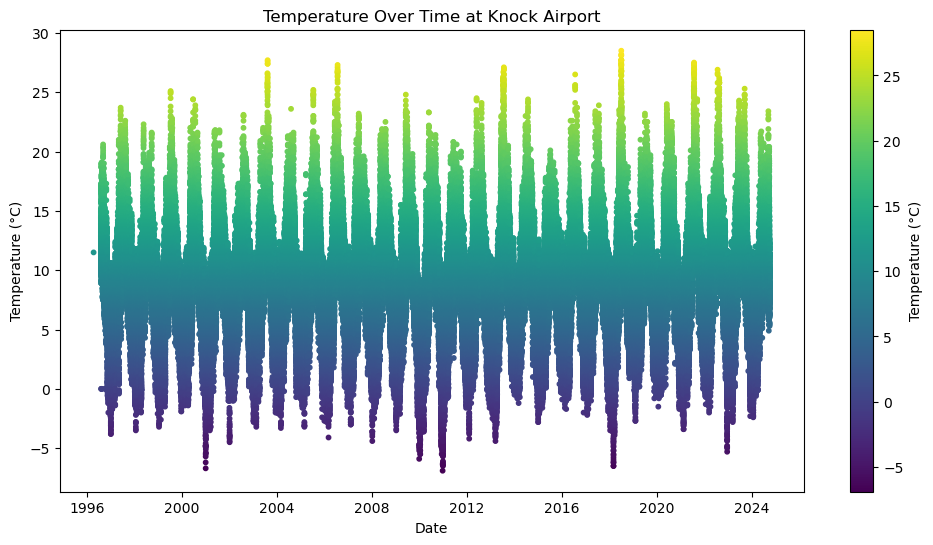

In [28]:
# Plot formating
plt.figure(figsize=(12, 6))
# Colors map
norm = mcolors.Normalize(vmin=df['temp'].min(), vmax=df['temp'].max())
cmap = plt.cm.viridis  
sc = plt.scatter(df['date'], df['temp'], c=df['temp'], cmap=cmap, norm=norm, s=10)
plt.colorbar(sc, label='Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time at Knock Airport')
plt.show()
# Show plot
plt.show()

## Graph of average temperature by day
Graph of average temperature by day, with color gradation for daily average temperature values.

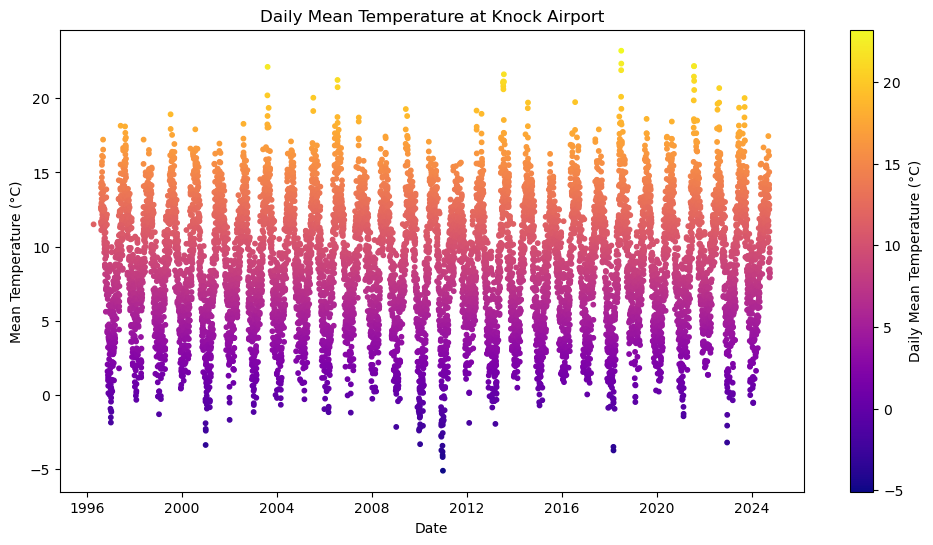

In [29]:
# Plot formating
plt.figure(figsize=(12, 6))
daily_mean_temp = df.set_index('date').resample('D')['temp'].mean()
# Colors map
norm = mcolors.Normalize(vmin=daily_mean_temp.min(), vmax=daily_mean_temp.max())
cmap = plt.cm.plasma
sc = plt.scatter(daily_mean_temp.index, daily_mean_temp, c=daily_mean_temp, cmap=cmap, norm=norm, s=10)
plt.colorbar(sc, label='Daily Mean Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Daily Mean Temperature at Knock Airport')
plt.show()
# Show plot
plt.show()

## Average temperature by month
Graph of average temperature by month with color gradation for average monthly temperature values.

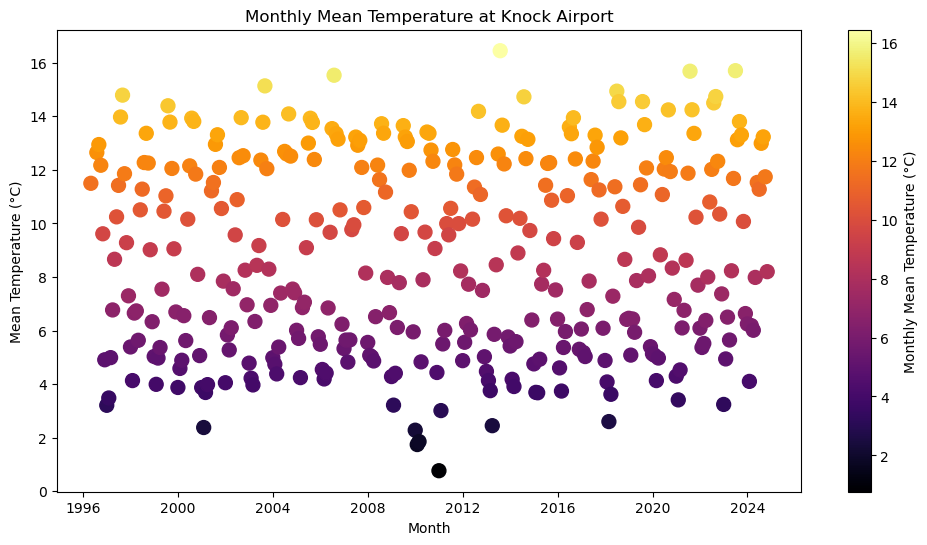

In [30]:
# Plot formating
monthly_mean_temp = df.set_index('date').resample('ME')['temp'].mean()
plt.figure(figsize=(12, 6))
# Colors map
norm = mcolors.Normalize(vmin=monthly_mean_temp.min(), vmax=monthly_mean_temp.max())
cmap = plt.cm.inferno
sc = plt.scatter(monthly_mean_temp.index, monthly_mean_temp, c=monthly_mean_temp, cmap=cmap, norm=norm, s=100)
plt.colorbar(sc, label='Monthly Mean Temperature (°C)')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Monthly Mean Temperature at Knock Airport')
# Show plot
plt.show()

## 24-hour Rolling Mean Wind Speed
24-hour moving average of wind speed with separate color gradation corresponding to the moving average values.

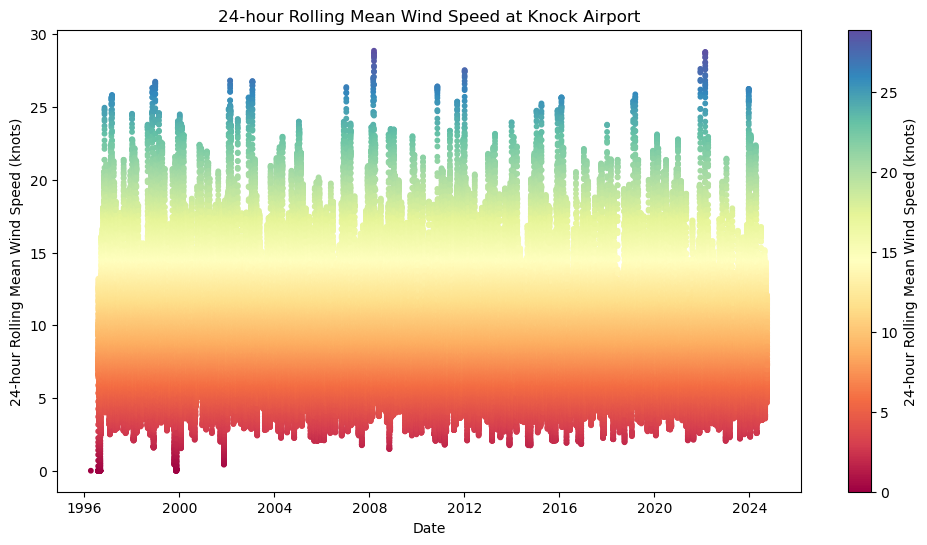

In [31]:
# Plot formating
plt.figure(figsize=(12, 6))
rolling_wdsp = df['wdsp'].rolling(window=24, min_periods=1).mean()
# Colors map
norm = mcolors.Normalize(vmin=rolling_wdsp.min(), vmax=rolling_wdsp.max())
cmap = plt.cm.Spectral
sc = plt.scatter(df['date'], rolling_wdsp, c=rolling_wdsp, cmap=cmap, norm=norm, s=10)
plt.colorbar(sc, label='24-hour Rolling Mean Wind Speed (knots)')
plt.xlabel('Date')
plt.ylabel('24-hour Rolling Mean Wind Speed (knots)')
plt.title('24-hour Rolling Mean Wind Speed at Knock Airport')
# Show plots
plt.show()

## Wind speed and moving average
Wind speed graph with color gradation corresponding to the speed values. Added a 24-hour moving average line to smooth out changes in wind speed.

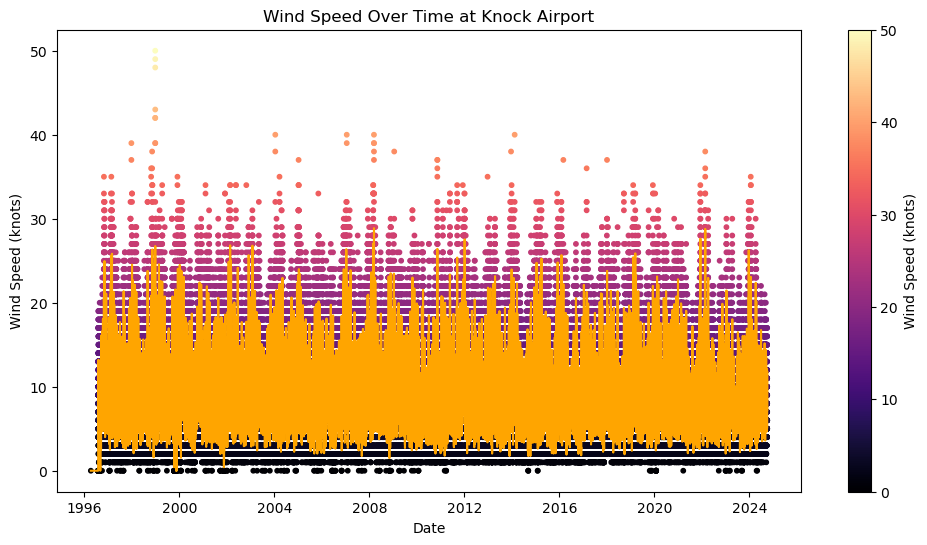

In [32]:
# Plot formating
rolling_wdsp = df['wdsp'].rolling(window=24, min_periods=1).mean()
plt.figure(figsize=(12, 6))
# Colors map
norm = mcolors.Normalize(vmin=df['wdsp'].min(), vmax=df['wdsp'].max())
cmap = plt.cm.magma
sc = plt.scatter(df['date'], df['wdsp'], c=df['wdsp'], cmap=cmap, norm=norm, s=10, label='Wind Speed (knots)')
plt.colorbar(sc, label='Wind Speed (knots)')
# Adding 24-hour rolling mean line
plt.plot(df['date'], rolling_wdsp, color='orange', label='24-hour Rolling Mean Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')
plt.title('Wind Speed Over Time at Knock Airport')
# Show plot
plt.show()

## Daily maximum values ​​of wind speed
Plot of maximum wind speed by day with color grading for maximum daily values.

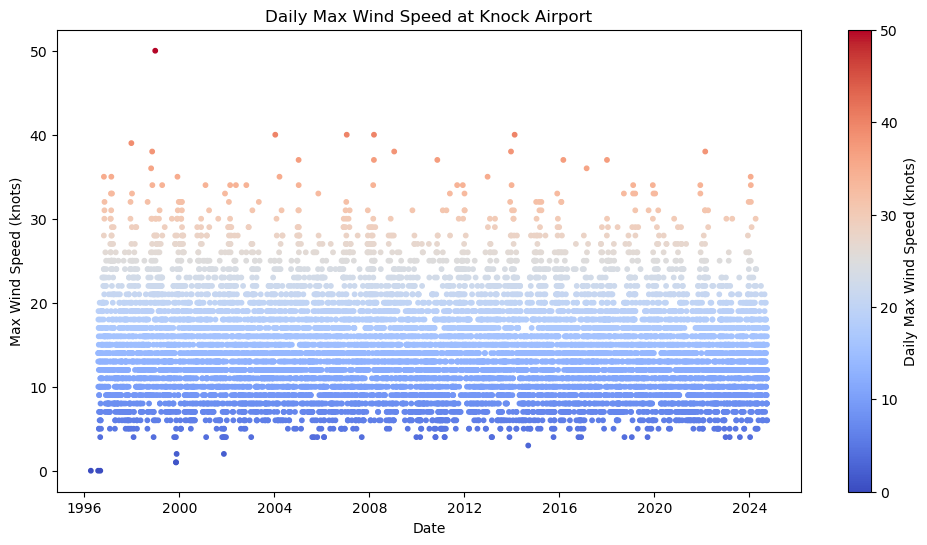

In [33]:
# Plot formating
plt.figure(figsize=(12, 6))
daily_max_wdsp = df.set_index('date').resample('D')['wdsp'].max()
# Colors map
norm = mcolors.Normalize(vmin=daily_max_wdsp.min(), vmax=daily_max_wdsp.max())
cmap = plt.cm.coolwarm
sc = plt.scatter(daily_max_wdsp.index, daily_max_wdsp, c=daily_max_wdsp, cmap=cmap, norm=norm, s=10)
plt.colorbar(sc, label='Daily Max Wind Speed (knots)')
plt.xlabel('Date')
plt.ylabel('Max Wind Speed (knots)')
plt.title('Daily Max Wind Speed at Knock Airport')
# Show plot
plt.show()

## Average monthly maximum wind speed
Plot of monthly mean maximum wind speed with color gradation for monthly mean maximum wind speed values.

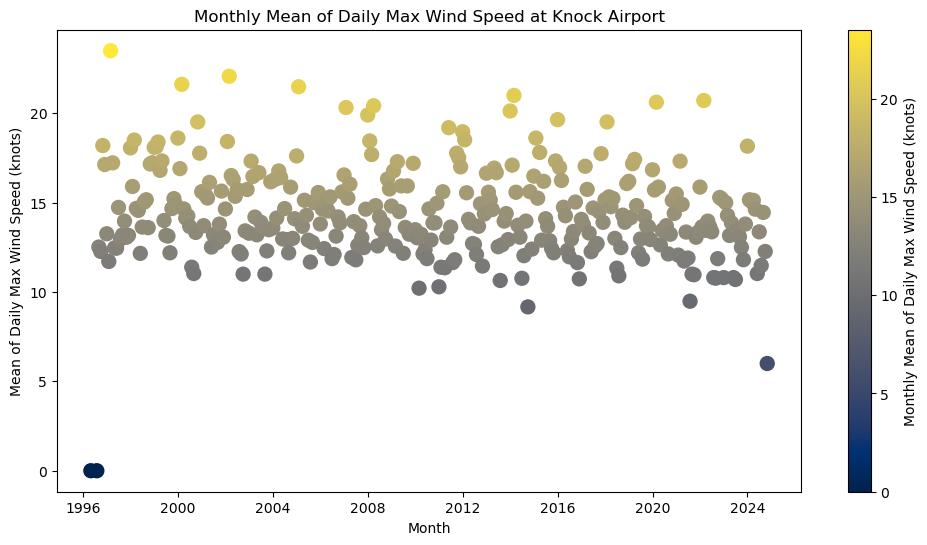

In [34]:
# Plot formating
plt.figure(figsize=(12, 6))
monthly_mean_max_wdsp = daily_max_wdsp.resample('ME').mean()
# Colors map
norm = mcolors.Normalize(vmin=monthly_mean_max_wdsp.min(), vmax=monthly_mean_max_wdsp.max())
cmap = plt.cm.cividis
sc = plt.scatter(monthly_mean_max_wdsp.index, monthly_mean_max_wdsp, c=monthly_mean_max_wdsp, cmap=cmap, norm=norm, s=100)
plt.colorbar(sc, label='Monthly Mean of Daily Max Wind Speed (knots)')
plt.xlabel('Month')
plt.ylabel('Mean of Daily Max Wind Speed (knots)')
plt.title('Monthly Mean of Daily Max Wind Speed at Knock Airport')
# Show plot
plt.show()

# End
***